<!--HEADER-->
*Tutorial sobre Flux.jl - 2020/2 [- Ricardo M. S. Rosa (IM/UFRJ)](http://www.im.ufrj.br/rrosa)*

<!--BADGES-->
<a href="https://nbviewer.jupyter.org/github/rmsrosa/TutorialFlux/blob/main/notebooks/07.00-Reconhecimento_digitos.ipynb" target="_blank"><img align="left" src="https://img.shields.io/badge/view%20in-nbviewer-orange" alt="View in NBViewer" title="View in NBViewer"></a><a href="https://mybinder.org/v2/gh/rmsrosa/TutorialFlux/julia-env-for-binder?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Frmsrosa%252FTutorialFlux%26branch%3Dmain%26urlpath%3Dtree%252FTutorialFlux%252Fnotebooks/07.00-Reconhecimento_digitos.ipynb" target="_blank"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open in binder"></a><a href="https://nbviewer.jupyter.org/github/rmsrosa/TutorialFlux/blob/main/notebooks/slides/07.00-Reconhecimento_digitos.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/view-slides-darkgreen" alt="View Slides" title="View Slides"></a>&nbsp;

<!--NAVIGATOR-->
[<- 6. Métodos de treinamento](06.00-Metodos_treinamento.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) 

---


# Identificação de dígitos com os dados MNIST

* A base de dados [MNIST](http://yann.lecun.com/exdb/mnist/) é um subconjunto de um conjunto de dígitos escritos à mão disponibilizados pelo [*National Institute of Standards and Technology (NIST)*](https://www.nist.gov), do Departamento de Comércio Americano.

* A base está disponível em [JuliaML/MLDatasets.jl](https://github.com/JuliaML/MLDatasets.jl).

* Veja mais sobre o [MLDatasets: The MNIST database of handwritten digits](https://juliaml.github.io/MLDatasets.jl/latest/datasets/MNIST/).

* O banco de dados contém 60 mil imagens para treino e 10 mil para teste.

* Cada imagem em resolução de 28x28 pixels de níveis inteiros de cinza entre 0 e 255.

In [1]:
using IterTools: ncycle, chain
using Flux
using Flux: onehotbatch, onecold # estes não são automaticamente exportados pelo Flux
using MLDatasets: MNIST
using ImageCore # usado para exibir os dígitos
using Plots

┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1317
┌ Info: Precompiling MLDatasets [eb30cadb-4394-5ae3-aed4-317e484a6458]
└ @ Base loading.jl:1317
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1317


## Baixando os dados

* Os dados podem ser recuperados em dois lotes, um de treino e outro de teste/validação.

* Vou usar apenas parte dos 60 mil dados, para acelerar o treino, ao custo de uma menor acurácia, mas com fins educativos, de agilizar o exemplo de treino.

In [2]:
train_x, train_y = MNIST.traindata(1:1_000)
test_x,  test_y  = MNIST.testdata(1:1_000)

(N0f8[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

N0f8[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

N0f8[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

...

N0f8[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

N0f8[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

N0f8[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8], [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  2, 3, 9, 0, 1, 2, 2, 0, 8, 9])

### Visualizando uma das imagens

In [3]:
n = 10
@show train_y[n]
MNIST.convert2image(MNIST.traintensor(n))
MNIST.convert2image(train_x[:,:,n])

train_y[n] = 4


## Sobre os dados


In [4]:
@show size(train_x), size(train_y)
@show size(test_x), size(test_y)
@show typeof(train_x[1,1,1]), typeof(train_y[1])

(size(train_x), size(train_y)) = ((28, 28, 1000), (1000,))
(size(test_x), size(test_y)) = ((28, 28, 1000), (1000,))
(typeof(train_x[1, 1, 1]), typeof(train_y[1])) = (N0f8, Int64)


(N0f8, Int64)

* O tipo `N0f8` é um *alias* para `Normed{UInt8,8}`, que é definido em [JuliaMath/FixedPointNumbers.jl/src/normed.jl](https://github.com/JuliaMath/FixedPointNumbers.jl/blob/master/src/normed.jl#L13).

* `Normed{UInt8,8}` mapeia inteiros não-negativos de 0 a 255 a números de ponto flutuante entre 0.0 e 1.0.

## Preprocessamento dos dados

In [5]:
data_x = reshape(train_x, 28^2, length(train_y))
data_x[:,n]

784-element Array{N0f8,1} with eltype N0f8:
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 ⋮
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8

In [6]:
MNIST.convert2image(data_x[:,n])

In [7]:
data_y = onehotbatch(train_y, 0:9)
data_y[:,n]

10-element Flux.OneHotVector{10,UInt32}:
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0

## Rede

* Como cada pixel é um nível de cinza entre 0 e 1, vamos "aumentar o contraste" com uma camada inicial da forma
$$ x -> \sigma(100(x-0.5)) = \frac{e^{100(x-0.5)}}{1 + e^{100(x-0.5)}}
$$

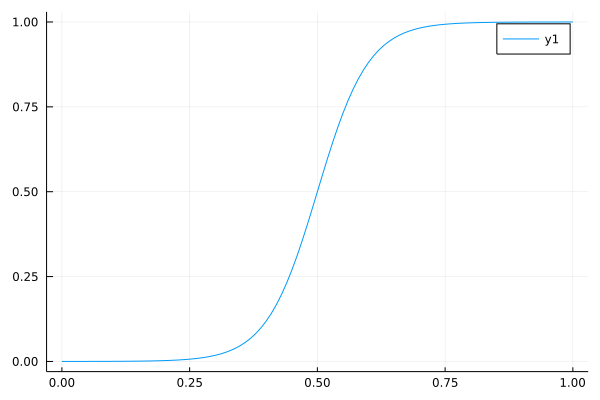

In [8]:
contrast(x) = σ.( 20 * (x .- 0.5) )
plot(0:0.01:1, contrast)

In [9]:
m = Chain(contrast,
  Dense(28^2, 28, relu),
  Dense(28, 10),
  softmax)

Chain(contrast, Dense(784, 28, relu), Dense(28, 10), softmax)

## Função de custo, otimizador e callback

* Aqui, usamos `crossentropy` como função de custo.

* Ela e muito usada em problemas de classificação, especialment em conjunto com uma camada final `softmax` e com as classificações dadas em formato `one-hot`/`one-cold`.

* Vale ressaltar que, por questões de estabilidade numérica, é recomendado o uso da função de custo `logitcrossentropy`, que combina o `softmax` com o `crossentropy` na própria função de custo. Nesse caso, no entanto, deve-se remover a camada `softmax` da rede, sem esquecer de aplicá-la explicitamente na fase de testes e de produção.

* O bom `ADAM` como otimizador.

* E uma função de callback para acompanharmos o treinamento.

In [10]:
loss(x, y) = Flux.Losses.crossentropy(m(x), y)

opt = ADAM();

function cb(i, shown; showstep = 1000) # função de call-back, executada a cada iteração
    global shown
    if i > shown
        @show i, loss(data_x,data_y)
        shown += showstep
    end
    return nothing
end

cb (generic function with 1 method)

## Treinamento

* Vamos fazer uma otimização estocástica em lotes.

* A ideia é dividir os dados em quatro blocos.

* Vamos usar o `DataLoader` para facilitar o processo de dividir os dados em lotes.

In [11]:
data_batch = Flux.Data.DataLoader((data_x, data_y), batchsize=div(last(size(data_y)),4))

n_epochs = 1_000
shown = 0
istep = 100
@time for i in chain(1:istep-1:istep, 2*istep:istep:n_epochs) # frescura
    @time Flux.train!(loss, params(m), ncycle(data_batch, istep), opt, cb = () -> cb(i, shown, showstep=istep))
    println()
end

(i, loss(data_x, data_y)) = (1, 2.2353398298525216)
120.836710 seconds (78.23 M allocations: 8.275 GiB, 4.66% gc time, 2.15% compilation time)

 14.414461 seconds (487.68 k allocations: 3.907 GiB, 8.29% gc time)

(i, loss(data_x, data_y)) = (200, 0.007903864210436498)
 14.475744 seconds (487.78 k allocations: 3.925 GiB, 8.81% gc time)

(i, loss(data_x, data_y)) = (300, 0.0033392515769717916)
 13.759659 seconds (487.89 k allocations: 3.925 GiB, 8.50% gc time)

(i, loss(data_x, data_y)) = (400, 0.0017932613613300319)
 26.982836 seconds (487.78 k allocations: 3.925 GiB, 8.49% gc time)

(i, loss(data_x, data_y)) = (500, 0.0010908832605651842)
 15.161932 seconds (487.78 k allocations: 3.925 GiB, 8.45% gc time)

(i, loss(data_x, data_y)) = (600, 0.0007154737773883326)
 14.894709 seconds (488.58 k allocations: 3.925 GiB, 7.86% gc time)

(i, loss(data_x, data_y)) = (700, 0.0004931662280861771)
 20.769632 seconds (488.69 k allocations: 3.925 GiB, 7.64% gc time)

(i, loss(data_x, data_y)) = (800

## Testando o resultado do treinamento

* Agora, vamos testar a rede treinada usando os dados de teste`test_x` e `test_y`.

* Com o `softmax`, que é usado em problemas de classificação, a saída da rede é um vetor indicando a probabilidade da imagem ser um ou outro dígito.

* Comparamos, então, o dígito com a maior probabilidade com o dígito do teste.

* Podemos fazer isso vendo o índice do elmento de maior valor, com `argmax`, ou usar a função `Flux.onecold`, que, nesse caso, retorna o índice com a maior probabilidade. Como o primeiro índice corresponde ao dígito zero, devemos subtrair 1 para termos o dígito correspondente.

* A acurácia é a porcentagem de acertos.

In [12]:
acuracia() = sum([onecold(m(reshape(test_x[:,:,n], :))) - 1 == test_y[n] for n in 1:length(test_y)])/length(test_y)

acuracia (generic function with 1 method)

In [13]:
println("Acurácia de $(100*acuracia()) %")

Acurácia de 82.8 %


## Outros treinos

* Uma sugestão é que refaçam o treinamento com outras redes (mais neurônios em uma camada, mais camadas, com camadas convolucionais).

* Também com mais e menos dados do que os utilizados (lembrem que usei, acima, apenas parte das 60 mil imagens).

* E com outros tamanhos de lote.

* E que comparem a acurácia e o tempo de treinamento com a rede acima.

* Nessa comparação, lembrem-se que a inicialização dos parâmetros da rede é aleatória e que isso influencia na convergência do treinamento. Portanto, essa comparação só tem validade científica, mesmo, com muitos treinamentos.

<!--NAVIGATOR-->

---
[<- 6. Métodos de treinamento](06.00-Metodos_treinamento.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) 